In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [23]:
a = 0.1

# Define the heights (z)
z = np.arange(-1, 1, 0.2)

# Define the angles for which we want to compute the cosines (in radians)
thetas_rad = np.arange(0.5, 2.05*np.pi, 0.2)
r = a*np.arange(0.5, 2.05*np.pi, 0.2)

# Calculate the cosine for each theta
cos_values = np.cos(thetas_rad)
sin_values = np.sin(thetas_rad)

x_values = r * cos_values
y_values = r * sin_values

# Output the result
print("Z (heights):", z)
print("Thetas (degrees):", thetas_rad)
print("Cosine values:", cos_values)
print("Sine values:", sin_values)
print("R values:", r)
print("X values:", x_values)
print("Y values:", y_values)

spirals = []
for i in range(len(z)):
    for j in range(len(thetas_rad)):
        spirals.append([x_values[j], y_values[j], z[i]])
        
spirals = np.array(spirals)

Z (heights): [-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01]
Thetas (degrees): [0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9
 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3]
Cosine values: [ 0.87758256  0.76484219  0.62160997  0.45359612  0.26749883  0.0707372
 -0.12884449 -0.32328957 -0.5048461  -0.66627602 -0.80114362 -0.90407214
 -0.97095817 -0.99913515 -0.98747977 -0.93645669 -0.84810003 -0.7259323
 -0.57482395 -0.40079917 -0.2107958  -0.01238866  0.18651237  0.37797774
  0.55437434  0.70866977  0.83471278  0.92747843  0.98326844  0.99985864]
Sine values: [ 0.47942554  0.64421769  0.78332691  0.89120736  0.96355819  0.99749499
  0.99166481  0.94630009  0.86320937  0.74570521  0.59847214  0.42737988
  0.23924933  0.04158066 -0.15774569 -0.35078323 -0.52983614 -0.68776616
 -0.81827711 -0.91616594 -0.97753012 -0.99992326 -0.98245261 -0.9258146

In [34]:
print('Each spiral has {} points'.format(len(x_values)))
print('There are {} spirals'.format(len(z)))

Each spiral has 30 points
There are 10 spirals


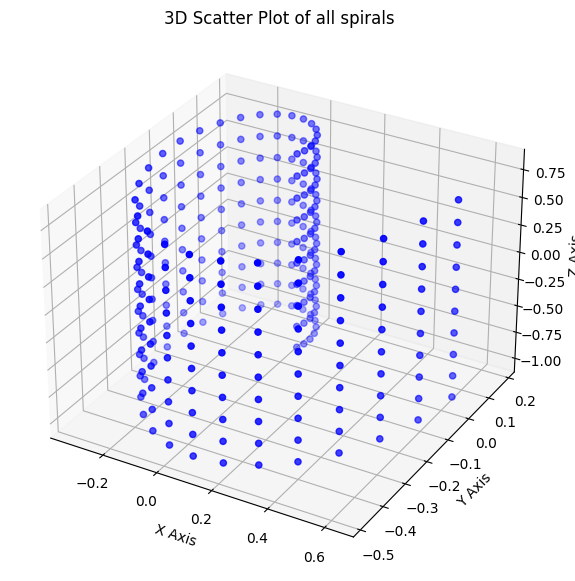

In [37]:
# Extract the x, y, z coordinates from the spirals
x_coords = spirals[:, 0]
y_coords = spirals[:, 1]
z_coords = spirals[:, 2]

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D space
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o')

# Set labels for axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set the title
ax.set_title('3D Scatter Plot of all spirals')

# Show the plot
plt.show()

### a) Apply Kernel PCA for 1 dimension with m=2 and for different parameters of the gaussian kernel

In [28]:
X = spirals
X.shape

(300, 3)

In [29]:
transformer = KernelPCA(n_components=1, kernel='rbf')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(300, 1)

Text(0.5, 1.0, 'Scatter Plot of X_transformed by Index')

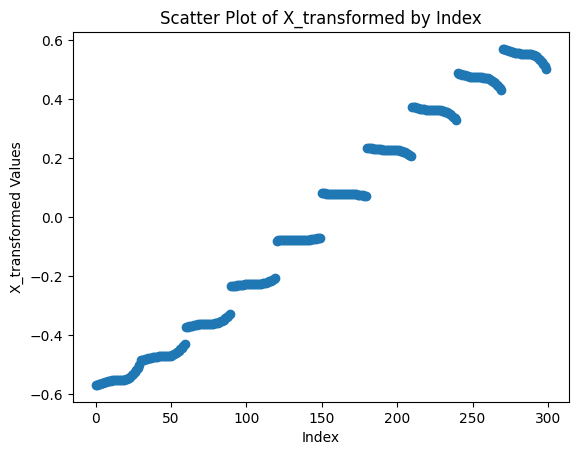

In [31]:
index = list(range(len(X_transformed)))

# Create the scatter plot
plt.scatter(index, X_transformed)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('X_transformed Values')
plt.title('Scatter Plot of X_transformed by Index')

### b) Do the same for 2 dimensions

In [35]:
X = spirals
X.shape

(300, 3)

In [36]:
transformer = KernelPCA(n_components=2, kernel='rbf')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(300, 2)

Text(0.5, 1.0, 'Scatter Plot of the 2 dimensions of X_transformed')

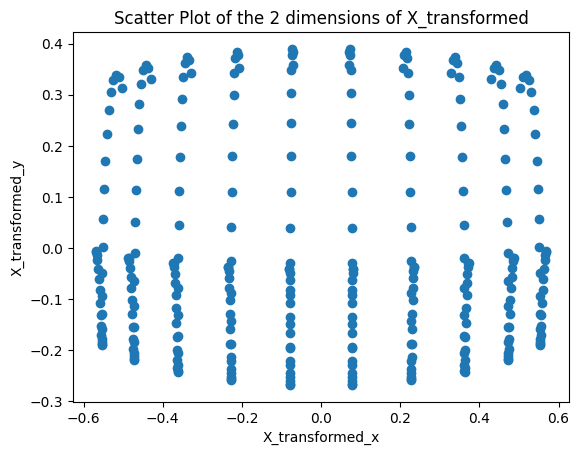

In [43]:
X_transformed_x = X_transformed[:,0]
X_transformed_y = X_transformed[:,1]

# Create the scatter plot
plt.scatter(X_transformed_x, X_transformed_y)

# Add labels and title
plt.xlabel('X_transformed_x')
plt.ylabel('X_transformed_y')
plt.title('Scatter Plot of the 2 dimensions of X_transformed')